<a href="https://colab.research.google.com/github/Blackbirdf16/Cryptography/blob/main/Lattice_Based_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning with Errors (LWE)

Consideremos el siguiente sistema de ecuaciones lineales módulo un número primo (47):

$$
\begin{cases}
-3x_1 + 20x_2 + 2x_3 - 6x_4 \equiv -22 \pmod{47} \\
-11x_1 - 12x_2 + 11x_3 - 20x_4 \equiv -1 \pmod{47} \\
11x_1 + 12x_2 + 3x_3 - 13x_4 \equiv 22 \pmod{47} \\
16x_1 - 2x_2 - 14x_3 - 18x_4 \equiv -17 \pmod{47}
\end{cases}
$$

Escribiremos el sistema en forma matricial por mayor comodidad:
$$
\begin{pmatrix}
-3 & 20 & 2 & -6 \\
-11 & -12 & 11 & -20 \\
11 & 12 & 3 & -13 \\
16 & -2 & -14 & -18 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{pmatrix}
\equiv
\begin{pmatrix}
-22 \\
-1 \\
22 \\
-17 \\
\end{pmatrix} \pmod{47}$$

Aunque en el sistema aparezca un módulo, el método de eliminación de Gauss se adapta fácilmente (sustituyendo divisiones por inversos multiplicativos) y nos permite resolver el sistema, hallando la siguiente solución:
$$s_{exacta}=\begin{pmatrix}
7 \\ 1 \\ 22 \\ 3
\end{pmatrix}$$

Podemos comprobar que es solución. En efecto:
$$
\begin{pmatrix}
-3 & 20 & 2 & -6 \\
-11 & -12 & 11 & -20 \\
11 & 12 & 3 & -13 \\
16 & -2 & -14 & -18 \\
\end{pmatrix}
\begin{pmatrix}
7 \\ 1 \\ 22 \\ 3
\end{pmatrix}
≡
\begin{pmatrix}
-22 \\
-1 \\
22 \\
-17 \\
\end{pmatrix}  \pmod{47}
$$

Obtener la solución exacta del sistema es **sencillo** gracias al método de eliminación de Gauss mencionado anteriormente.

Ahora, consideraremos el siguiente vector, y veamos si es solución del sistema:
$$s_{aprox}=\begin{pmatrix}
0 \\ 1 \\ -1 \\ -1
\end{pmatrix}$$

$$
\begin{pmatrix}
-3 & 20 & 2 & -6 \\
-11 & -12 & 11 & -20 \\
11 & 12 & 3 & -13 \\
16 & -2 & -14 & -18 \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 1 \\ -1 \\ -1
\end{pmatrix}
≡
\begin{pmatrix}
-23 \\
-3 \\
22 \\
-17 \\
\end{pmatrix}  \pmod{47}
$$

Podemos observar que $s_{aprox}$ no es solución del sistema, pero se acerca bastante a serlo. Además, $s_{aprox}$ tiene una propiedad muy interesante que no tiene $s_{exacta}$, y es que sus coeficientes son pequeños módulo 47.

En general, hallar este tipo de "soluciones" es **difícil**.

Veamos como podemos usar esto para cifrar y descifrar mensajes.

Imaginemos que queremos cifrar un bit (0 ó 1), realizamos los siguientes pasos:

Primero, combinamos las 4 ecuaciones originales multiplicándolas por coeficientes pequeños aleatoriamente y sumándolas para obtener una nueva ecuación. Por ejemplo, sumemos la primera y segunda ecuación y restémosle a la suma la cuarta ecuación. Nos queda:

$$
17x_1 + 10x_2 - 20x_3 - 8x_4 \equiv -6 \pmod{47} \\
$$

Matricialmente, hemos hecho lo siguiente:
$$
\begin{pmatrix}
1 & 1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
-3 & 20 & 2 & -6 \\
-11 & -12 & 11 & -20 \\
11 & 12 & 3 & -13 \\
16 & -2 & -14 & -18 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{pmatrix}
\equiv
\begin{pmatrix}
1 & 1 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
-22 \\
-1 \\
22 \\
-17 \\
\end{pmatrix} \pmod{47}
$$


$$
\begin{pmatrix}
17 & 10 & -20 & -8
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{pmatrix}
\equiv
-6 \pmod{47}
$$

Una vez obtenemos la nueva ecuación, añadimos pequeños errores en sus coeficientes. Por ejemplo, modificamos la ecuación de la siguiente forma:
$$
16x_1 + 11x_2 - 19x_3 - 6x_4 \equiv -7 \pmod{47} \\
$$

Finalmente, "introducimos" nuestro bit a cifrar en la ecuación haciendo lo siguiente: si queremos cifrar un 0, no hacemos nada, y si queremos cifrar un 1, añadimos un error grande al término independiente módulo 47. En este caso, el error que añadiremos para cifrar 1 será $\lfloor 47/2 \rfloor = 23.$

Entonces, si queremos cifrar un 0, publicaremos la ecuación
$$
16x_1 + 11x_2 - 19x_3 - 6x_4 \equiv -7 \pmod{47} \tag{1} \\
$$
Si por el contrario queremos cifrar un 1, publicaremos la ecuación
$$
16x_1 + 11x_2 - 19x_3 - 6x_4 \equiv -7+23 \pmod{47} \\
$$
Es decir,
$$
16x_1 + 11x_2 - 19x_3 - 6x_4 \equiv 16 \pmod{47} \tag{2} \\
$$

La idea es que el sistema de ecuaciones original es público, luego cualquiera puede realizar estos pasos y cifrar el bit que desee.

Ahora viene la parte del descifrado, es decir, queremos obtener el bit "escondido" en la ecuación publicada. Tendremos que distinguir entre un usuario que conozca $s_{aprox}$ y otro que sólo conozca $s_{exacta}$ (recordemos que esta última siempre es fácil de obtener a partir del sistema).

En cualquiera de los casos, para descifrar el mensaje sustituiremos nuestra "solución" en la ecuación, y compararemos lo obtenido con el término independiente de la ecuación. Si ambos números difieren mucho (módulo 47), consideraremos que se ha cifrado un 1. Si por el contrario se parecen mucho, supondremos que se ha cifrado un 0.

El usuario que posee $s_{aprox}$ sustituirá esta en la ecuación, obteniendo:

$$16 \cdot 0 + 11 \cdot 1 + (-19) \cdot (-1) + (-6) \cdot (-1) \equiv -11 \pmod{47}$$

Si se hubiera publicado la ecuación (1), como el término independiente, -7, es parecido a -11 salvo por un error pequeño, consideramos que se ha cifrado un 0.
Si se hubiera publicado la ecuación (2), como -11 difiere mucho de 16, diremos que se ha cifrado un 1.
Vemos que hemos descifrado el mensaje correctamente en ambos casos.

Ahora, supongamos que sólo conocemos $s_{exacta}$, entonces intentamos repetir el proceso, y al sustituir en la ecuación, obtenemos:

$$16 \cdot 7 + 11 \cdot 1 + (-19) \cdot 22 + (-6) \cdot 3 \equiv 16 \pmod{47}$$

En este caso, si comparamos con la ecuación (1), devolveremos que se ha cifrado un 1, y si comparamos con la ecuación (2), devolveremos que se ha cifrado un 0.
Vemos que no hemos descifrado correctamente en ninguno de los casos.

Veamos qué ha ocurrido. Primero introduzcamos algunos nombres:

El sistema original lo escribiremos de la forma $Ax=t$, es decir, diremos que $A$ es la matriz de coeficientes del sistema y $t$ el vector de términos independientes.
En nuestro caso,
$$A=\begin{pmatrix}
-3 & 20 & 2 & -6 \\
-11 & -12 & 11 & -20 \\
11 & 12 & 3 & -13 \\
16 & -2 & -14 & -18 \\
\end{pmatrix}$$

$$t=\begin{pmatrix}
25 \\
-1 \\
22 \\
-17 \\
\end{pmatrix}$$
Ahora, dada una solución o solución aproximada del sistema $Ax=t \pmod{47}$, llamada $s$ (por ejemplo $s_{exacta}$ o $s_{aprox}$), llamaremos $e$ al error con el que dicha solución resuelve el sistema, es decir:
$$e = t - Ax \pmod{47}$$
En nuestro caso, tenemos:
$$e_{exacta}=
\begin{pmatrix}
0 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

$$e_{aprox}=
\begin{pmatrix}
1 \\ 2 \\ 0 \\ 0
\end{pmatrix}
$$

Además, llamamos $y$ al vector con los coeficientes por los que multiplicamos las ecuaciones del sistema cuando ciframos. En nuestro caso,
$$y=
\begin{pmatrix}
1 \\ 1 \\ 0 \\ -1
\end{pmatrix}
$$

$e1$ y $e2$ serán los errores que se le añaden a la ecuación obtenida tras combinar las ecuaciones originales. $e1$ corresponde a los errores de los coeficientes que acompañan a las incógnitas y $e2$ es el error del término independiente.
Hemos usado antes
$$e1=
\begin{pmatrix}
-1 \\ 1 \\ 1 \\ 2
\end{pmatrix}
$$

$$
e2=-1
$$

$\mu$ será el error que añadimos al término independiente de la ecuación para introducir el bit cifrado. En nuestro caso, para cifrar cero, $\mu=0$, y para cifrar 1, $\mu=23$.

Finalmente, llamamos $u$ y $v$ al vector de coeficientes y al término independiente de la ecuación publicada ((1) o (2)). Por ejemplo, en el caso de la ecuación (2):
$$u=
\begin{pmatrix}
16 \\
11 \\
-19 \\
-6
\end{pmatrix}
$$

$$v=16
$$

Así, podemos escribir cómo se obtienen $u$ y $v$ mediante la siguiente fórnula:
$$u=A^Ty+e_1$$
$$v=t^Ty+e_2+\mu$$

Supongamos ahora que intentamos descifrar el bit en la ecuación formada por $u$ y $v$ con un vector $s$, que verificará $As+e=t$, para cierto error $e$.

Al sustitur $s$ en la ecuación, lo que hacemos es calcular el producto escalar de $s$ y $u$, es decir, $s^Tu$. Lo que hacemos con este resultado es compararlo con $v$, y ver si la diferencia es grande o pequeña. Calculamos por tanto:

$$v-s^Tu = $$

$$t^Ty+e_2+\mu-s^TA^Ty-s^Te_1 = $$

$$t^Ty+e_2+\mu-(As)^Ty-s^Te_1 = $$

$$t^Ty+e_2+\mu-(t-e)^Ty-s^Te_1 = $$

$$t^Ty+e_2+\mu-t^Ty+e^Ty-s^Te_1 = $$

$$e_2+\mu+e^Ty-s^Te_1$$

Por tanto, obtenemos el mensaje $\mu$ modificado por cierto error $e_2+e^Ty-s^Te_1$.

Los vectores $y$ y $e_1$ siempre tienen coeficientes pequeños, al igual que el número $e_2$ que es también pequeño.
Ahora bien, la clave está en $e$ y $s$. Si usamos una solución que aproxima muy mal al sistema, $e$ será grande, luego $e^Ty$ también puede ser grande, por lo que no podremos recuperar $\mu$ a partir de $v-s^Tu$. Por otro lado, si $s$ es grande, ocurre lo mismo con $s^Te_1$. Por tanto, sólo cuando $s$ es pequeño y el error $e$ también es pequeño, podemos garantizar que $v-s^Tu$ se parece mucho a $\mu$. En tal caso, si $v-s^Tu$ es pequeño, sabemos que debe ser $\mu=0$, luego se ha cifrado un 0, y si $v-s^Tu$ es grande, debe ser $\mu=23$, con lo que se ha cifrado un 1.

Esta es la razón por la que todo funciona correctamente cuando utilizamos $s_{aprox}$, pero no cuando usamos $s_{exacta}$, pues con la última, puede que $s^Te_1$ haga que $v-s^Tu$ tome un valor pequeño aunque fuese $\mu=23$. Cabe destacar que, usando $s=s_{exacta}$, algunas veces $s^Te_1$ será grande y otras pequeño, con lo que a veces descifraremos bien y otras mal, pero esto es lo esperado, pues la idea final será descifrar un mensaje de varios bits, y al descifrar bien unos y mal otros, estaremos obteniendo un mensaje que no tiene nada que ver con el original.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
import hashlib
from google.colab import files

La siguiente función nos permitirá obtener vectores de coeficientes pequeños (en concreto con coeficientes en $[-\nu,\nu]$, donde $\nu$ es un parámetro que se le pasa a la función). La distribución que se usa para tomar estos coeficientes no es uniforme, pues el coeficiente 0 es el que se obtiene con mayor probabilidad, decreciendo dicha probabilidad según nos alejamos del 0.

In [ ]:
def SamplePolyCBD(nu,k,q):#Para obtener vectores de coeficientes pequeños
  #q: módulo
  #nu: Los enteros generados estarán entre -nu y nu modulo q
  #k: Número de enteros generados
  f = np.zeros(k, dtype=int)
  b = np.random.randint(2,size=2*k*nu)
  for i in range(k):
    x = sum(b[2*i*nu:2*i*nu+nu])
    y = sum(b[2*i*nu+nu:2*(i+1)*nu])
    f[i] = (x-y) % q
  return f

Podemos visualizar la distribución que siguen los coeficientes, por ejemplo para $\nu=3$.

Número de muestras: 14000


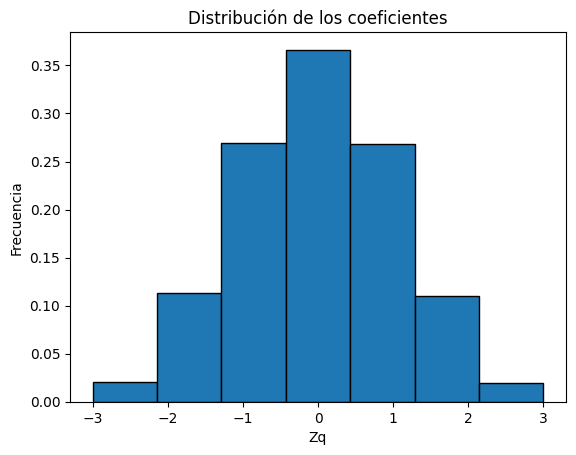

In [ ]:
nu=3
k=14
q=3329
array = []
for i in range(1000):
  array = np.concatenate((array,SamplePolyCBD(nu,k,q)))

print("Número de muestras:",len(array))

for i in range(len(array)):
  if(array[i]>q//2):
    array[i]=array[i]-q

# Crear el histograma
plt.hist(array, bins=2*nu+1, edgecolor='black',density=True)

# Añadir etiquetas y título
plt.title('Distribución de los coeficientes')
plt.xlabel('Zq')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

La siguiente función nos permitirá generar un sistema lineal de ecuaciones. Primero elegimos un vector pequeño $s$ para luego formar un sistema que tenga como solución aproximada dicho vector. Los coeficientes del sistema van a la clave pública (ek), mientras que la solución $s$ va a la clave privada (dk).

In [ ]:
#@title Ajusta coeficientes
def adjust_array_mod_q(arr, q):
    # Crea un nuevo array para almacenar los resultados
    adjusted_arr = []

    # Recorre cada elemento del array
    for val in arr:
        # Calcula el valor módulo q
        mod_val = val % q

        # Ajusta el valor para que esté en el rango -q/2 a q/2
        if mod_val > q / 2:
            mod_val -= q  # Si el valor es mayor que q/2, restamos q para llevarlo al rango negativo

        # Si el valor es menor o igual a q/2, lo dejamos como está
        adjusted_arr.append(mod_val)

    return adjusted_arr

In [ ]:
def K_PKE_KeyGen(nu,k,q):
  A = np.random.randint(q,size=(k,k))
  s = SamplePolyCBD(nu,k,q)
  e = SamplePolyCBD(nu,k,q)
  t = (A@s+e) % q
  ek = [A,t]
  dk = s
  return [ek,dk]

In [ ]:
nu=3
k=14
q=3329
[ek,dk] = K_PKE_KeyGen(nu,k,q)
print("A =\n",ek[0])
print("t = ",ek[1])
print("s = ",adjust_array_mod_q(dk,q))

A =
 [[1217 1965 1244 1842 1460 2328 3133 1207 2615 1658  275 2150  647 1148]
 [ 668 3087 2429 1932 3109 3287 1487 1633  993 2855  789 1133   83 2274]
 [ 645 2041 1848 3062 2665 1026 2789 2138 1749 1719  753 1882  317 2584]
 [2055 1361 3175  679 1253 2670  898 2008  981 3222  369 2571   65 2949]
 [ 780 1491 3194 1823 2560  828 1090  775 2101 1065 2296  105 1322  841]
 [1771 1102 1297  594  651 2824 2695 2833 2501 1118  862  950 3253  172]
 [2382  942 2456  938 3140  294 1917 1127 1659 3211 2409  482 2700 1912]
 [1564  560 1755 1930  179 1171 1875 2445 1752  756 3294 2783  876 1698]
 [3058 1952  646 2076 1230  342 1619 1785  360   53  990  538 2125  424]
 [2449  875 3322  107 2568   82  627 2640 1151 2902 2418 3250 2479 3007]
 [3152 1072   14 1798 2220  996 2301 3071 1566  145 3012 2550 3223 2509]
 [2710  578 3057 1737  275 2388 3151 2910 1007 1610 1294  821 1020 2494]
 [ 537 2071 1504 1616  400 1921 1483 1863 2911  291 1544 1390  832 2576]
 [2773  629 1058 2529  560 2591  157 2628 2835

La siguiente función nos permite cifrar un bit m:

In [ ]:
def K_PKE_Encrypt(ek,m,q,nu):
  #m: bit a cifrar

  A = ek[0]
  t = ek[1]
  k = len(t)

  y = SamplePolyCBD(nu,k,q) #Coeficientes para combinar las filas de A
  e1 = SamplePolyCBD(nu,k,q)
  e2 = SamplePolyCBD(nu,1,q)[0]

  u = (A.T@y + e1)%q
  mu = m*(q//2)
  v = (t@y + e2 + mu)%q

  return [u,v]

In [ ]:
#Ciframos un 0
[u, v] = K_PKE_Encrypt(ek,0,q,nu)
print("u =",u)
print("v =",v)

u = [3117  570 1338 2436 2443  786 2875 1861   16  557  943  697  224 2614]
v = 472


Con la siguiente función, podremos descifrar un bit a partir de la clave privada, el cifrado (u,v) y el módulo q:

In [ ]:
def K_PKE_Decrypt(dk,u,v,q):
  s = dk
  w = (v - s@u)%q
  m = round(w*2/q)%2 #Lo que se hace es ver quién está más cerca de v-su, si 0 o q/2. En el primer caso se asigna m=0, y en el segundo, m=1.
  return m

In [ ]:
m = K_PKE_Decrypt(dk,u,v,q)
print("m =",m)

m = 0


Veamos cómo podríamos encontrar un vector s' tal que As'=t. Para ello usaremos una función (gaussresolver) que resuelve sistemas lineales módulo q, y que hace uso de las funciones remonte (para resolver sistemas lineales módulo q donde la matriz de coeficientes ya es triangular superior) y mod_inverse, que nos permite calcular inversos multiplicativos (usando la versión extendida del algoritmo de Euclides: gcd_extended). Gaussresolver por tanto lo que hace es transformar el sistema en uno con matriz de coeficientes triangular superior, haciendo ceros mediante el método de eliminación de Gauss.

In [ ]:
def gcd_extended(a, b):
    # Caso base
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = gcd_extended(b % a, a)

    # Actualizamos x e y
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

def mod_inverse(a, q):
    gcd, x, _ = gcd_extended(a, q)
    if gcd != 1:
        raise ValueError(f"No existe inverso multiplicativo para {a} módulo {q} (GCD ≠ 1)")
    else:
        # Aseguramos que el inverso sea positivo
        return x % q

In [ ]:
def remonte(A, B, q):
    m, n = np.shape(A)
    p, r = np.shape(B)
    if m != n or n != p or r < 1:
        raise RuntimeError("Error remonte: error en las dimensiones.")
    if min(abs(np.diag(A))) == 0:
        raise RuntimeError("Error remonte: matriz singular.")
    X = np.zeros((n, r), dtype=int)
    for i in range(n-1,-1,-1):
        X[i, :] = B[i, :]
        if i != n-1:
            X[i, :] = (X[i,:] - A[i, i+1:]@X[i+1:, :]) % q
        X[i, :] = (X[i, :]*mod_inverse(A[i, i],q) ) % q
    return X

In [ ]:
def gaussresolver(A,B,q):
    m, n = np.shape(A)
    p, r = np.shape(B)
    if m != n or n != p or r < 1:
        return False, "Error gaussresolver: error en las dimensiones."
    gaussA = np.array(A, dtype=int)
    gaussB = np.array(B, dtype=int)
    for k in range(n-1):
        ik = k
        while(ik<n-1 and gaussA[ik,k] == 0):
            ik += 1
        if ik != k:
            gaussA[[ik, k], :] = gaussA[[k, ik], :]
            gaussB[[ik, k], :] = gaussB[[k, ik], :]
        if gaussA[k, k] != 0:
            for i in range(k+1, n):
                gaussA[i, k] = (gaussA[i, k]*mod_inverse(gaussA[k, k],q)) % q
                gaussA[i, k+1:] = (gaussA[i, k+1:] - gaussA[i, k]*gaussA[k, k+1:]) % q
                gaussB[i, :] = (gaussB[i, :] - gaussA[i, k]*gaussB[k, :]) % q
    return remonte(gaussA, gaussB, q)

In [ ]:
[ek,dk] = K_PKE_KeyGen(nu,k,q)
A = ek[0]
t = ek[1]
s = dk
sprima = gaussresolver(A,np.vstack(t),q)[:,0]
print("s=",adjust_array_mod_q(s,q))
print("s'=",adjust_array_mod_q(sprima,q)) #Observar que los coeficientes de s' son completamente diferentes de los de s, y no son pequeños
print("As'- t mod q =",(A@sprima-t)%q) #Si el sistema se resolvió correctamente se imprimirá el vector nulo

s= [0, 1, -2, 1, 0, -1, 1, 1, -1, 1, -1, 2, 1, 0]
s'= [-277, -379, 618, -1282, -400, -1592, 1319, 1351, -1162, 137, -488, 372, -672, -870]
As'- t mod q = [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Intentamos descifrar un bit cifrado con la clave pública, pero usando la solución s' encontrada. Si ejecutamos la celda varias veces, observaremos que en ocasiones el bit se descifra correctamente y en otras no.

In [ ]:
[ek,dk] = K_PKE_KeyGen(nu,k,q)
sprima = gaussresolver(A,np.vstack(ek[1]),q)[:,0]
print("s=",adjust_array_mod_q(dk,q))
print("s'=",adjust_array_mod_q(sprima,q))
m = 0
print("Mensaje que queremos cifrar:",m)
[u, v] = K_PKE_Encrypt(ek,m,q,nu)
print("Cifrado:")
print("u =",u)
print("v =",v)
mprima = K_PKE_Decrypt(sprima,u,v,q)
print("Mensaje descifrado con sprima:",mprima)

s= [-1, 0, 0, 2, -1, -1, -1, 0, 1, 1, -1, -1, 1, 1]
s'= [-1532, -513, 1306, -1028, -35, 178, -984, 559, 1367, 814, 516, -293, 141, -550]
Mensaje que queremos cifrar: 0
Cifrado:
u = [2800 3142  622  333  107  896 1541 2345 3113 2925 2286 2928 3117  694]
v = 3279
Mensaje descifrado con sprima: 0


Vamos a cifrar bastantes bits para ver qué porcentaje se descifra correctamente usando tanto s como s'. La idea es que estamos enviando un mensaje, pero cifrando cada uno de sus bits por separado, para luego descifrar cada uno de sus bits y volver a formar el mensaje.

In [ ]:
[ek,dk] = K_PKE_KeyGen(nu,k,q)
A=ek[0]
t=ek[1]
sprima = gaussresolver(A,np.vstack(t),q)[:,0]
print("s=",adjust_array_mod_q(dk,q))
print("s'=",adjust_array_mod_q(sprima,q))
m = np.random.randint(2,size=256)
m_s = np.zeros(256,dtype=int)
m_sprima = np.zeros(256,dtype=int)
for i in range(len(m)):
  [u, v] = K_PKE_Encrypt(ek,m[i],q,nu)
  m_s[i] = K_PKE_Decrypt(dk,u,v,q) #Mensaje descifrado con s
  m_sprima[i] = K_PKE_Decrypt(sprima,u,v,q) #Mensaje descifrado con s'
print("Mensaje antes de cifrar: m=",m)
print("Mensaje tras descifrar con s: m'=",m_s)
print("Porcentaje de aciertos usando s:",100-100*sum(abs(m-m_s))/len(m),"%")#Debería ser el 100%
print("Mensaje tras descifrar con s': m'=",m_sprima)
print("Porcentaje de aciertos usando s':",100-100*sum(abs(m-m_sprima))/len(m),"%")

s= [0, 0, -2, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 1]
s'= [1534, -667, 1194, 777, 634, -1069, 1529, -235, 1075, 598, -1129, 1418, 1531, -1193]
Mensaje antes de cifrar: m= [1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0]
Mensaje tras descifrar con s: m'= [1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 

Si observamos un porcentaje cercano al 50% para s', entonces este "ataque" para descifrar mensajes sin conocer la clave privada no nos es útil, pues es lo mismo que predecir cada bit de forma aleatoria. Con s debería obtenerse un 100% de aciertos, como es de esperar.

Vamos a intentar ver cuántos vectores pequeños hay que aproximen t salvo por un error pequeño. Utilizaremos una búsqueda por fuerza bruta sobre todos los vectores "pequeños" mod q (coeficientes en [-nu,nu], con nu=3 por ejemplo).

In [ ]:
q=3329
nu=3 #Valores grandes pueden tomar mucho tiempo de ejecución
k=7 #Valores grandes pueden tomar mucho tiempo de ejecución
cota_vector_pequeño = nu #Podemos relajar la cota para que un vector sea pequeño y ver qué ocurre
[ek,dk] = K_PKE_KeyGen(nu,k,q)
A = ek[0]
t = ek[1]
print("A=",A)
print("t=",t)
print("s=",adjust_array_mod_q(dk,q))

cont_total = 0 #Contador de vectores probados
cont_soluciones = 0 #Contador de los vectores que resuelven aproximadamente el sistema y son pequeños encontrados
s = np.zeros(k,dtype=int)-cota_vector_pequeño #Inicializamos el vector de coeficientes pequeños a [-nu,...,-nu]
s[0] = s[0] - 1
sfinal = np.zeros(k,dtype=int)+cota_vector_pequeño #El último vector que probaremos será [nu,...,nu]
while not all(s==sfinal):
  cont_total = cont_total + 1 #Contamos cuántos vectores hemos probado
  #Avanzamos al siguiente vector pequeño
  i=0
  while(s[i]==cota_vector_pequeño):
    s[i] = -cota_vector_pequeño
    i = i + 1
  s[i] = s[i] + 1

  #Calculamos el error de As a t
  e = (t - A@s) % q

  #Comprobamos si el error anterior es pequeño mod q
  epequeno=True
  j=0
  while(j<len(e) and epequeno):
    if e[j]>cota_vector_pequeño and e[j]<q-cota_vector_pequeño:
      epequeno=False
    j = j + 1
  if epequeno:
    cont_soluciones = cont_soluciones + 1
    print("Solución aproximada y pequeña encontrada:",adjust_array_mod_q(s%q,q))
print("Número de vectores pequeños recorridos (debe ser (2nu+1)^k):",cont_total)
print("Número de soluciones aproximadas y pequeñas encontradas:",cont_soluciones)

A= [[2248 1335  648 2264 1959 3171 1043]
 [3237 3148   10 3188  121 2957  833]
 [2682 2678 2887 2464 1647 2903 2594]
 [2479 2084 2954  556  364  286  696]
 [ 164  345 2871 3211 1533 3218 1304]
 [ 407   46  407  747    3 3261 2246]
 [ 816 1456   29 2320 2258 2944 3115]]
t= [2289 3224  353 1042  299  503 1865]
s= [2, 2, 0, 1, 1, 1, 1]
Solución aproximada y pequeña encontrada: [2, 2, 0, 1, 1, 1, 1]
Número de vectores pequeños recorridos (debe ser (2nu+1)^k): 823543
Número de soluciones aproximadas y pequeñas encontradas: 1


Aunque en este caso hemos podido realizar el ataque por fuerza bruta y encontrar la clave privada (y además comprobar que no existen más vectores pequeños que sean una solución aproximada del sistema), en el caso del algoritmo estandarizado por el NIST, este ataque sería irrealizable ya que tendríamos que explorar todos los vectores de tamaño 512 con coeficientes en $[-3,3]$ (o $[-2,2]$ según los parámetros usados), es decir, $7^{512}$ posibilidades.

Vamos a probar a hacer lo mismo pero con un módulo más pequeño. Ejecuta la celda las veces necesarias hasta obtener algún vector distinto de s (hasta que haya más de un vector encontrado).

In [ ]:
q=47
nu=3
k=6
cota_vector_pequeño = nu #Podemos relajar la cota para que un vector sea pequeño y ver qué ocurre
[ek,dk] = K_PKE_KeyGen(nu,k,q)
A = ek[0]
t = ek[1]
print("A=",A)
print("t=",t)
print("s=",adjust_array_mod_q(dk,q))

solucionDiferente = None

cont_total = 0 #Contador de vectores probados
cont_soluciones = 0 #Contador de los vectores que resuelven aproximadamente el sistema y son pequeños encontrados
s = np.zeros(k,dtype=int)-cota_vector_pequeño #Inicializamos el vector de coeficientes pequeños a [-nu,...,-nu]
s[0] = s[0] - 1
sfinal = np.zeros(k,dtype=int)+cota_vector_pequeño #El último vector que probaremos será [nu,...,nu]
while not all(s==sfinal):
  cont_total = cont_total + 1 #Contamos cuántos vectores hemos probado
  #Avanzamos al siguiente vector pequeño
  i=0
  while(s[i]==cota_vector_pequeño):
    s[i] = -cota_vector_pequeño
    i = i + 1
  s[i] = s[i] + 1

  #Calculamos el error de As a t
  e = (t - A@s) % q

  #Comprobamos si el error anterior es pequeño mod q
  epequeno=True
  j=0
  while(j<len(e) and epequeno):
    if e[j]>cota_vector_pequeño and e[j]<q-cota_vector_pequeño:
      epequeno=False
    j = j + 1
  if epequeno:
    cont_soluciones = cont_soluciones + 1
    print("Solución aproximada y pequeña encontrada:",adjust_array_mod_q(s%q,q))
    if any((s%q)!=dk):
      solucionDiferente = s.copy()
print("Número de vectores pequeños recorridos (debe ser (2nu+1)^n):",cont_total)
print("Número de soluciones aproximadas y pequeñas encontradas:",cont_soluciones)

A= [[32 20 10 31  0 45]
 [36 28 40 21 43  3]
 [ 2 27 37 24  6 29]
 [15 14 18  4  6 43]
 [ 6  5 29  3 12 44]
 [45 19 16 36 19 26]]
t= [43 17  9  2 25 24]
s= [1, 0, 1, 0, 3, 0]
Solución aproximada y pequeña encontrada: [1, 0, 1, 0, 3, 0]
Solución aproximada y pequeña encontrada: [-1, 1, 0, -1, 3, 3]
Número de vectores pequeños recorridos (debe ser (2nu+1)^n): 117649
Número de soluciones aproximadas y pequeñas encontradas: 2


Usaremos como s' alguno de los vectores distintos de s encontrados en la celda anterior. Vamos a cifrar y descifrar con la clave privada original s y con la "clave alternativa" s' y veamos qué resultados obtenemos.

In [ ]:
s = dk
if solucionDiferente is not None:
  sprima = solucionDiferente #Colocar aquí el vector
  print("s=",adjust_array_mod_q(dk,q))
  print("s'=",adjust_array_mod_q(sprima,q))

  m = np.random.randint(2,size=256) #Mensaje aleatorio
  m_s = np.zeros(256,dtype=int)
  m_sprima = np.zeros(256,dtype=int)
  for i in range(len(m)):
    [u, v] = K_PKE_Encrypt(ek,m[i],q,nu)
    m_s[i] = K_PKE_Decrypt(dk,u,v,q) #Mensaje descifrado con s
    m_sprima[i] = K_PKE_Decrypt(sprima,u,v,q) #Mensaje descifrado con s'
  print("Mensaje antes de cifrar: m=",m)
  print("Mensaje tras descifrar con s: m'=",m_s)
  print("Porcentaje de aciertos usando s:",100-100*sum(abs(m-m_s))/len(m),"%")#Debería ser el 100%
  print("Mensaje tras descifrar con s': m'=",m_sprima)
  print("Porcentaje de aciertos usando s':",100-100*sum(abs(m-m_sprima))/len(m),"%")
else:
  print("No se encontraron soluciones pequeñas alternativas. Ejecute la celda anterior hasta obtener soluciones diferentes.")

s= [1, 0, 1, 0, 3, 0]
s'= [-1, 1, 0, -1, 3, 3]
Mensaje antes de cifrar: m= [1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1]
Mensaje tras descifrar con s: m'= [1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 

Observamos que s' da mejores resultados que antes, pero a costa de que la propia clave privada s no consiga descifrar correctamente el 100% de los mensajes. Esto nos dice que, aunque los vectores $s$ y $e$ son pequeños, con respecto al módulo son lo suficientemente grandes cómo para que el mensaje original no se pueda recuperar correctamente. Se puede probar con otros módulos más grandes y ver si se siguen encontrando soluciones alternativas, y en tal caso repetir lo anterior.

También se puede aumentar el número de vectores pequeños ( aumentando cota_vector_pequeño), con lo que encontraremos más vectores, pero el descifrado será peor pues estamos añadiendo ruido.

Ahora introduciremos una variante de LWE que consiste en usar polinomios en vez de números enteros, lo que nos permitirá poder cifrar un mayor número de bits cada vez.

Esta variante se conoce como M-LWE (Module Learning with Errors). En ella, los elementos de las matrices y vectores son polinomios de grado menor que $n$ con coeficientes modulo $q$. La suma de dos polinomios es la usual (sumamos coeficiente a coeficiente y aplicamos modulo $q$), y la multiplicación es la usual añadiendo cierta reducción para que el polinomio siga siendo de grado menor que $n$.

Por ejemplo, supongamos que estamos usando $q=8$, $n=4$ y como polinomio de reducción $x^4+1$, y tenemos que sumar o multiplicar los polinomios $1+5x+x^2$ y $4x+3x^3$.
Su suma será $1+5x+x^2+4x+3x^3 = 1+9x+x^2+3x^3 = 1+x+x^2+3x^3$.

La idea para que al multiplicar los polinomios obtengamos de nuevo un polinomio de grado menor que $n$ es que $x^4+1=0$, o $x^4=-1$, es decir, cuando obtengamos un coeficiente asociado a $x^4$ o exponente superior, sustituiremos $x^4$ por $-1$ hasta que el exponente esté entre 0 y 3. Finalmente reduciremos módulo q siempre.
Por tanto, la multiplicación de los polinomios anteriores será $(1+5x+x^2)(4x+3x^3) = 4x+3x^3+20x^2+15x^4+4x^3+3x^5 = 4x+20x^2+7x^3+15x^4+3x^5 = 4x+20x^2+7x^3-15-3x = -15+x+20x^2+7x^3 = 1+x+4x^2+7x^3$.

Implementemos una función para multiplicar polinomios de esta forma (supondremos que el polinomio de reducción siempre es $x^n+1$):

In [ ]:
def multiplyPoly(f,g,n,q):#No eficiente, solo para pruebas
  #n: número de coeficientes de los polinomios. El polinomio por el que reducimos es X^n+1
  h = np.zeros(n, dtype=int)
  for i in range(n):
    for j in range(n):
      if i+j<n:
        h[i+j] = (h[i+j] + f[i]*g[j])%q
      else:
        h[i+j-n] = (h[i+j-n] - f[i]*g[j])%q
  return h

Usemos los polinomios anteriores, representandolos como arrays. Por ejemplo, $1+5x+x^2$ será el array $[1,5,1,0]$.

Al multiplicarlos, deberíamos obtener como resultado el array [1,1,4,7], es decir, el polinomio $1+x+4x^2+7x^3$.

In [ ]:
f = [1,5,1,0]
g = [0,4,0,3]
h = multiplyPoly(f,g,n=4,q=8)
print(h)

[1 1 4 7]


Como hemos visto antes, en nuestros algoritmos, los polinomios serán arrays de tamaño $n$, con coeficientes enteros entre $0$ y $q-1$.

La generación de claves es muy similar a la ya implementada, pero ahora la matriz A, al ser una matriz de polinomios, tendrá 3 dimensiones, pues en la posición (i,j) de la matriz tenemos un array de tamaño $n$. Igualmente, $s$, $e$ y $t$ tendrán dos dimensiones, una para acceder a uno de los polinomios del vector, y otra para acceder a los coeficientes del polinomio elegido.

Al multiplicar matrices y vectores, tendremos que usar multiplyPoly en vez del operador @.

In [ ]:
def K_PKE_KeyGen_Poly(nu,k,q,n):
  #n es el número de coeficientes de cada polinomio
  A = np.random.randint(q,size=(k,k,n))

  s = np.zeros((k,n),dtype=int)
  for i in range(k):
    s[i] = SamplePolyCBD(nu,n,q)

  e = np.zeros((k,n),dtype=int)
  for i in range(k):
    e[i] = SamplePolyCBD(nu,n,q)

  t = np.zeros((k,n),dtype=int)
  for i in range(k):
    t[i] = (sum([multiplyPoly(A[i][j],s[j],n,q) for j in range(k)]) + e[i]) %q

  ek = [A,t]
  dk = s
  return [ek,dk]

Las siguientes funciones nos permitirán visualizar mejor los polinomios al imprimirlos por pantallas. Estas funciones transforman los arrays que representan polinomios en cadenas de texto con el formato usual con el que se escribe un polinomio.

In [ ]:
def formato_polinomio(coeficientes):
    terms = []
    for i, coef in enumerate(coeficientes):
        if coef != 0:
            if len(terms) == 0:
                if i == 0:
                    terms.append(f"{coef}")
                elif i == 1:
                    terms.append(f"{coef}x")
                else:
                    terms.append(f"{coef}x^{i}")
            else:
                if i == 1:
                    terms.append(f"{'+' if coef > 0 else '-'} {abs(coef)}x")
                else:
                    terms.append(f"{'+' if coef > 0 else '-'} {abs(coef)}x^{i}")
    return ' '.join(terms)

def formato_matriz_polinomios(matriz):
    resultado = "["
    for fila in matriz:
        polinomios_fila = [formato_polinomio(polinomio) for polinomio in fila]
        resultado += "[" + " , ".join(polinomios_fila) + "],\n"
    resultado = resultado.rstrip(",\n")
    resultado += "]"
    return resultado

def formato_vector_polinomios(vector):
    polinomios = [formato_polinomio(polinomio) for polinomio in vector]
    resultado = "[" + " , ".join(polinomios) + "]"
    return resultado

import numpy as np

def adjust_matrix_mod_q(matrix, q):
    # Convertir la entrada a un array de numpy para manejar tanto vectores como matrices
    matrix = np.array(matrix)

    # Aplicar la lógica de ajuste sobre cada elemento de la matriz (independientemente de si es 1D o 2D)
    adjusted_matrix = np.vectorize(lambda x: (x % q - q) if (x % q) > q / 2 else (x % q))(matrix)

    return adjusted_matrix

In [ ]:
nu=3
k=4
q=3329
n=6
[ek,dk] = K_PKE_KeyGen_Poly(nu,k,q,n)
print("A =\n",formato_matriz_polinomios(ek[0]))
print("t = ",formato_vector_polinomios(ek[1]))
print("s = ",formato_vector_polinomios(adjust_matrix_mod_q(dk,q)))

A =
 [[1119 + 1822x + 762x^2 + 2939x^3 + 841x^4 + 963x^5 , 1997 + 66x + 2865x^2 + 545x^3 + 1739x^4 + 3203x^5 , 1514 + 3226x + 1389x^2 + 2070x^3 + 2482x^4 + 2666x^5 , 869 + 388x + 1764x^2 + 1058x^3 + 156x^4 + 1236x^5],
[2328 + 249x + 1586x^2 + 281x^3 + 1906x^4 + 340x^5 , 429 + 3208x + 3054x^2 + 2495x^3 + 316x^4 + 1018x^5 , 2027 + 2823x + 1302x^2 + 1889x^3 + 2287x^4 + 1193x^5 , 2886 + 2990x + 2155x^2 + 1694x^3 + 2699x^4 + 1756x^5],
[475 + 1256x + 279x^2 + 1261x^3 + 2488x^4 + 1922x^5 , 288 + 2407x + 2669x^2 + 700x^3 + 1537x^4 + 372x^5 , 2015 + 2093x + 84x^2 + 1025x^3 + 1998x^4 + 1430x^5 , 292 + 1461x + 1208x^2 + 1745x^3 + 2013x^4 + 2795x^5],
[2770 + 2643x + 1753x^2 + 1327x^3 + 1219x^4 + 2x^5 , 793 + 1376x + 528x^2 + 113x^3 + 464x^4 + 2594x^5 , 1072 + 1875x + 1091x^2 + 2969x^3 + 186x^4 + 330x^5 , 2691 + 3006x + 1142x^2 + 1366x^3 + 1x^4 + 2807x^5]]
t =  [2562 + 1441x + 2641x^2 + 3301x^3 + 1729x^4 + 500x^5 , 925 + 2562x + 1838x^2 + 3037x^3 + 447x^4 + 2095x^5 , 2154 + 2780x + 887x^2 + 454x^3 

De la misma forma, la función de cifrado se adapta fácilmente. La diferencia importante es que ahora $v$ es un polinomio, y por tanto podemos decidir si añadir un error significativo o no a cada uno de sus coeficientes. Esto se traduce en que podremos cifrar $n$ bits de una vez. El mensaje $m$ tendrá que tener por tanto longitud $n$, y cada uno de sus bits nos dirá si tenemos que añadir error o no a cada coeficiente de $v$.

In [ ]:
def K_PKE_Encrypt_Poly(ek,m,q,nu,n):
  #m: Vector de bits a cifrar, de longitud n

  A = ek[0]
  t = ek[1]
  k = len(t)

  y = np.zeros((k,n),dtype=int)
  for i in range(k):
    y[i] = SamplePolyCBD(nu,n,q)

  e1 = np.zeros((k,n),dtype=int)
  for i in range(k):
    e1[i] = SamplePolyCBD(nu,n,q)

  e2 = SamplePolyCBD(nu,n,q)

  u = np.zeros((k,n),dtype=int)
  for i in range(k):
    u[i] = (sum([multiplyPoly(A[j][i],y[j],n,q) for j in range(k)]) + e1[i]) %q

  mu = np.zeros(n,dtype=int)
  for i in range(n):
    mu[i] = m[i]*(q//2)

  v = (sum([multiplyPoly(t[j],y[j],n,q) for j in range(k)]) + e2 + mu) %q

  return [u,v]

Veamos un ejemplo:

In [ ]:
nu=3
k=4
q=3329
n=3
m=np.array([0,1,0])
print("m =",m)
[ek,dk] = K_PKE_KeyGen_Poly(nu,k,q,n)
[u, v] = K_PKE_Encrypt_Poly(ek,m,q,nu,n)
print("u =",formato_vector_polinomios(u))
print("v =",formato_polinomio(v))

m = [0 1 0]
u = [2841 + 1012x + 1295x^2 , 2772 + 624x + 1290x^2 , 846 + 371x + 2059x^2 , 2566 + 1158x + 2791x^2]
v = 2807 + 62x + 1853x^2


Por último, adaptamos la función de descifrado:

In [ ]:
def K_PKE_Decrypt_Poly(dk,u,v,q,n):
  s = dk

  w = (v - sum([multiplyPoly(s[j],u[j],n,q) for j in range(k)]))%q

  m = np.zeros(n,dtype=int)
  for i in range(n):
    m[i] = round(w[i]*2/q)%2
  return m

Vemos un ejemplo de cifrado y descifrado de un mensaje. Observar que $m$ y $m'$ coinciden, es decir, hemos descifrado correctamente el mensaje.

In [ ]:
nu=3
k=4
q=3329
n=7
m=np.array([0,1,1,0,1,1,1])
[ek,dk] = K_PKE_KeyGen_Poly(nu,k,q,n)
[u, v] = K_PKE_Encrypt_Poly(ek,m,q,nu,n)
mprima = K_PKE_Decrypt_Poly(dk,u,v,q,n)
print("m =",m)
print("u =",formato_vector_polinomios(u))
print("v =",formato_polinomio(v))
print("m' =",mprima)

m = [0 1 1 0 1 1 1]
u = [668 + 2864x + 2294x^2 + 2909x^3 + 2931x^4 + 2237x^5 + 2886x^6 , 210 + 1753x + 2177x^2 + 2792x^3 + 2314x^4 + 1751x^5 + 2021x^6 , 3015 + 1813x + 1342x^2 + 1002x^3 + 1637x^4 + 2052x^5 + 2401x^6 , 1332 + 851x + 1647x^2 + 3126x^3 + 245x^4 + 3012x^5 + 2648x^6]
v = 2559 + 1731x + 1546x^2 + 2405x^3 + 2441x^4 + 2763x^5 + 2626x^6
m' = [0 1 1 0 1 1 1]


Vamos a definir un par de funciones para obtener el mensaje en bits a partir de un mensaje en texto y viceversa.

In [ ]:
def mensajeToBits(M):
  #M: String
  bytes_mensaje = M.encode('utf-8')
  m = [int(bit) for byte in bytes_mensaje for bit in f"{byte:08b}"]
  return m

def bytesToBits(bytes_mensaje):
  #M: bytes
  m = [int(bit) for byte in bytes_mensaje for bit in f"{byte:08b}"]
  return m

In [ ]:
print(mensajeToBits("Hola"))

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [ ]:
def bitsToMensaje(b):
  #b: Array de bits
  bytes_list = [b[i:i+8] for i in range(0, len(b), 8)]
  bytes_values = [int(''.join(map(str, byte)), 2) for byte in bytes_list]
  texto = bytes(bytes_values).decode('utf-8')
  return texto

def bitsToBytes(b):
  #b: Array de bits
  bytes_list = [b[i:i+8] for i in range(0, len(b), 8)]
  bytes_values = [int(''.join(map(str, byte)), 2) for byte in bytes_list]
  return bytes(bytes_values)

In [ ]:
print(bitsToMensaje([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]))
print(bitsToBytes([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]))

Hola
b'Hola'


Vamos a definir también funciones para exportar e importar nuestras claves públicas y privadas. Al exportar, crearemos dos ficheros, uno con ambas claves y otro que sólo tenga la clave pública. Ambos ficheros incluirán además el resto de parámetros (q,n,k,nu).

In [ ]:
def export_claves(nombre_fichero, ek, dk, q, n, k, nu):
    np.savez_compressed(nombre_fichero+"_priv", ek_0=ek[0], ek_1=ek[1], dk=dk, q=q, n=n, k=k, nu=nu)
    np.savez_compressed(nombre_fichero+"_pub", ek_0=ek[0], ek_1=ek[1], q=q, n=n, k=k, nu=nu)
    print(f"Información guardada en {nombre_fichero}_priv.npz y {nombre_fichero}_pub.npz")

In [ ]:
def import_claves(nombre_fichero):
    datos = np.load(nombre_fichero)
    ek = [datos['ek_0'], datos['ek_1']]
    dk = datos['dk'] if 'dk' in datos else None
    q = int(datos['q'])
    n = int(datos['n'])
    k = int(datos['k'])
    nu = int(datos['nu'])
    print(f"Información cargada desde {nombre_fichero}")
    return ek, dk, q, n, k, nu

Además definiremos funciones para exportar e importar un mensaje cifrado, es decir, el par (u,v).

In [ ]:
def export_mensaje_cifrado(nombre_fichero, u, v):
    np.savez_compressed(nombre_fichero, u=u, v=v)
    print(f"Información guardada en {nombre_fichero}.npz")

In [ ]:
def import_mensaje_cifrado(nombre_fichero):
    datos = np.load(nombre_fichero)
    u = datos['u']
    v = datos['v']
    print(f"Información cargada desde {nombre_fichero}")
    return u, v

Vamos a ver un ejemplo de cómo usar estas funciones

Primero generemos un par de claves para ciertos parámetros q, n, k y nu, y descargemos los archivos con dichas claves

In [ ]:
nu=3
k=2
q=3329
n=256
[ek,dk] = K_PKE_KeyGen_Poly(nu,k,q,n)
nombre_fichero = "claves"
export_claves(nombre_fichero,ek,dk,q,n,k,nu)
files.download(nombre_fichero+"_priv.npz")
files.download(nombre_fichero+"_pub.npz")

Información guardada en claves_priv.npz y claves_pub.npz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

La idea ahora sería enviar el fichero público a alguien que queremos que nos envíe un mensaje secreto. No debemos enviar el fichero privado (_priv), pues contiene nuestra clave privada.

Cuando la otra persona reciba el fichero _pub, podrá importar sus datos de la siguiente forma:

In [ ]:
cargado = files.upload()
if len(list(cargado.keys()))==0:
  print("No se subió ningún archivo")
else:
  nombre_fichero = list(cargado.keys())[0]
  print("Fichero subido:",nombre_fichero)
  ek, dk, q, n, k, nu= import_claves(nombre_fichero)

Saving claves_pub (1).npz to claves_pub (1).npz
Fichero subido: claves_pub (1).npz
Información cargada desde claves_pub (1).npz


Observemos que dk es None, es decir, el fichero _pub no contenía la clave privada.

In [ ]:
print(dk)

None


Ahora es el momento de preparar un mensaje y cifrarlo. Es importante que la longitud del mensaje en bits coincida con n. Recordemos que cada carácter se traduce en 8 bits. Para poder enviar mensajes más pequeños, añadiremos 0's hasta llegar a la longitud deseada, o recortaremos el mensaje si es más largo de lo debido.

In [ ]:
mensaje = "Mensaje secreto"
m = mensajeToBits(mensaje)
if len(m) < n:
    m_extendido = m + [0] * (n - len(m))
else:
    m_extendido = m[0:n]
[u, v] = K_PKE_Encrypt_Poly(ek,m_extendido,q,nu,n)
print("u=",formato_vector_polinomios(u))
print("v=",formato_polinomio(v))

u= [1028 + 2970x + 575x^2 + 235x^3 + 503x^4 + 1145x^5 + 2843x^6 + 3030x^7 + 3137x^8 + 2997x^9 + 2642x^10 + 165x^11 + 587x^12 + 1007x^13 + 2230x^14 + 2244x^15 + 2565x^16 + 1189x^17 + 3188x^18 + 2283x^19 + 649x^20 + 533x^21 + 2448x^22 + 283x^23 + 2961x^24 + 3103x^25 + 1139x^26 + 1198x^27 + 2273x^28 + 2183x^29 + 1728x^30 + 2192x^31 + 1412x^32 + 1836x^33 + 366x^34 + 342x^35 + 1375x^36 + 2711x^37 + 2316x^38 + 1638x^39 + 1914x^40 + 634x^41 + 1716x^42 + 2024x^43 + 2390x^44 + 725x^45 + 1494x^46 + 3042x^47 + 2672x^48 + 1819x^49 + 1158x^50 + 1360x^51 + 1823x^52 + 131x^53 + 2054x^54 + 2613x^55 + 2298x^56 + 139x^57 + 1566x^58 + 108x^59 + 771x^60 + 216x^61 + 714x^62 + 1156x^63 + 814x^64 + 1343x^65 + 2488x^66 + 811x^67 + 2194x^68 + 888x^69 + 509x^70 + 953x^71 + 3059x^72 + 1672x^73 + 2726x^74 + 2579x^75 + 1023x^76 + 1283x^77 + 616x^78 + 2582x^79 + 923x^80 + 1157x^81 + 2711x^82 + 1100x^83 + 3289x^84 + 2542x^85 + 798x^86 + 811x^87 + 1508x^88 + 1130x^89 + 794x^90 + 2267x^91 + 72x^92 + 2241x^93 + 3297x^9

Ahora guardamos el mensaje cifrado obtenido.

In [ ]:
nombre_fichero = "mensaje_cifrado"
export_mensaje_cifrado(nombre_fichero,u,v)
files.download(nombre_fichero+".npz")

Información guardada en mensaje_cifrado.npz


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ahora, se debe enviar este archivo al que posea la clave privada, pues es el único capaz de descifrarlo.

Una vez recibido el archivo, habremos de importarlo.

In [ ]:
cargado = files.upload()
if len(list(cargado.keys()))==0:
  print("No se subió ningún archivo")
else:
  nombre_fichero = list(cargado.keys())[0]
  print("Fichero subido:",nombre_fichero)
  u,v = import_mensaje_cifrado(nombre_fichero)

Saving mensaje_cifrado (1).npz to mensaje_cifrado (1).npz
Fichero subido: mensaje_cifrado (1).npz
Información cargada desde mensaje_cifrado (1).npz


También tendremos que volver a importar las claves si no las tenemos actualmente en memoria. Esta vez importaremos el archivo .priv

In [ ]:
cargado = files.upload()
if len(list(cargado.keys()))==0:
  print("No se subió ningún archivo")
else:
  nombre_fichero = list(cargado.keys())[0]
  print("Fichero subido:",nombre_fichero)
  ek, dk, q, n, k, nu= import_claves(nombre_fichero)

KeyboardInterrupt: 

Usando la clave privada, descifraremos el mensaje, y lo transformaremos en texto, eliminando los bytes con todos sus bits a 0 (supondremos que se han añadido como relleno).

In [ ]:
mprima = K_PKE_Decrypt_Poly(dk,u,v,q,n)
mensaje = bitsToMensaje(mprima).rstrip('\x00')
print(mensaje)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 0: invalid continuation byte

Aunque hayamos usado el algoritmo para cifrar y descifrar mensajes de texto, es importante recordar que el uso real de este algoritmo es el de enviar un mensaje de 256 bits aleatorios, los cuales se pueden usar como clave secreta para un algoritmo de cifrado y descifrado de criptografía simétrica, con el que sí enviaremos mensajes cualesquiera.

**Ejercicio**

Prueba a quitar el error e1 en el algoritmo de encriptado K_PKE_Encrypt y realiza de nuevo el ataque que consiste en obtener la solución exacta del sistema. Prueba a cifrar y descifrar un mensaje bit a bit tal y como se hizo anteriormente, y observa qué porcentaje de aciertos se obtiene.

**Solución**

In [ ]:
def K_PKE_Encrypt_modified(ek,m,q,nu):
  #m: bit a cifrar

  A = ek[0]
  t = ek[1]
  k = len(t)

  y = SamplePolyCBD(nu,k,q) #Coeficientes para combinar las filas de A
  e2 = SamplePolyCBD(nu,1,q)[0]

  u = (A.T@y)%q
  mu = m*(q//2)
  v = (t@y + e2 + mu)%q

  return [u,v]

In [ ]:
nu=3
k=14
q=3329
[ek,dk] = K_PKE_KeyGen(nu,k,q)
A=ek[0]
t=ek[1]
sprima = gaussresolver(A,np.vstack(t),q)[:,0]
print("s=",dk)
print("s'=",sprima)
m = np.random.randint(2,size=256)
m_s = np.zeros(256,dtype=int)
m_sprima = np.zeros(256,dtype=int)
for i in range(len(m)):
  [u, v] = K_PKE_Encrypt_modified(ek,m[i],q,nu)
  m_s[i] = K_PKE_Decrypt(dk,u,v,q) #Mensaje descifrado con s
  m_sprima[i] = K_PKE_Decrypt(sprima,u,v,q) #Mensaje descifrado con s'
print("Mensaje antes de cifrar: m=",m)
print("Mensaje tras descifrar con s: m'=",m_s)
print("Porcentaje de aciertos usando s:",100-100*sum(abs(m-m_s))/len(m),"%")#Debería ser el 100%
print("Mensaje tras descifrar con s': m'=",m_sprima)
print("Porcentaje de aciertos usando s':",100-100*sum(abs(m-m_sprima))/len(m),"%")

s= [3327    1 3328    0 3328    0    2 3327    1    0    2 3328    0    1]
s'= [1561 1818 1172  569  859 1811  735 1897 1918  131 2843  550 2306 1468]
Mensaje antes de cifrar: m= [1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0]
Mensaje tras descifrar con s: m'= [1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0

Observamos que se descifra el mensaje correctamente usando la solución exacta (s'). Recordemos que al descifrar, el bit codificado en $\mu$ se veía modificado por $e_2+e^Ty-s^Te_1$. En este caso $e=0$ pues la solución $s$ es exacta, y $e_1=0$, luego el único error que aparece es $e_2$, que siempre es pequeño.

# Key Encapsulation

Prueba a ejecutar un encapsulado de claves y usar la clave para [AES-GCM](https://cryptography.io/en/latest/hazmat/primitives/aead/#cryptography.hazmat.primitives.ciphers.aead.AESGCM).

In [ ]:
import os
from cryptography.hazmat.primitives.ciphers.aead import AESGCM
data = b"Hola"
aad = b"No hay"
key = AESGCM.generate_key(bit_length=256)

# Pedir clave pública

# Cifrar Key con LWE -> KEM
m = bytesToBits(key)
if len(m) < n:
    m_extendido = m + [0] * (n - len(m))
else:
    m_extendido = m[0:n]
[u, v] = K_PKE_Encrypt_Poly(ek,m_extendido,q,nu,n)
print("u=",formato_vector_polinomios(u))
print("v=",formato_polinomio(v))
nombre_fichero = "KEM"
export_mensaje_cifrado(nombre_fichero,u,v)
files.download(nombre_fichero+".npz")
# Cifrar Key con LWE -> KEM

key = bytes.fromhex("708804a4e63215e65be38a726c28ac81")
aesgcm = AESGCM(key)

nonce = bytes.fromhex("3dda45835e5223250ce56a3a")
print("AAD: ",aad)
print("Nonce: ",nonce.hex())
ct = aesgcm.encrypt(nonce, data, aad)
print("Ciphertext: ",ct.hex())
m = aesgcm.decrypt(nonce, ct, aad)

u= [341 + 2362x + 2384x^2 + 3136x^3 + 1015x^4 + 1414x^5 + 2149x^6 + 2576x^7 + 2014x^8 + 1867x^9 + 709x^10 + 535x^11 + 2365x^12 + 889x^13 + 933x^14 + 2945x^15 + 1253x^16 + 2033x^17 + 424x^18 + 739x^19 + 2445x^20 + 107x^21 + 643x^22 + 2131x^23 + 1852x^24 + 2267x^25 + 352x^26 + 1752x^27 + 2644x^28 + 1447x^29 + 620x^30 + 2251x^31 + 93x^32 + 1126x^33 + 2961x^34 + 2808x^35 + 965x^36 + 1197x^37 + 18x^38 + 2411x^39 + 1148x^40 + 2097x^41 + 2969x^42 + 2566x^43 + 382x^44 + 1787x^45 + 3109x^46 + 1205x^47 + 3283x^48 + 1408x^49 + 2643x^50 + 2169x^51 + 1753x^52 + 2791x^53 + 2056x^54 + 1553x^55 + 2232x^56 + 2514x^57 + 2263x^58 + 1551x^59 + 1193x^60 + 2383x^61 + 521x^62 + 2946x^63 + 1830x^64 + 2176x^65 + 3110x^66 + 2341x^67 + 2949x^68 + 449x^69 + 669x^70 + 1529x^71 + 2543x^72 + 2691x^73 + 2364x^74 + 2470x^75 + 849x^76 + 711x^77 + 1801x^78 + 1562x^79 + 460x^80 + 15x^81 + 3058x^82 + 2625x^83 + 1550x^84 + 1846x^85 + 2046x^86 + 1181x^87 + 1607x^88 + 2939x^89 + 1002x^90 + 660x^91 + 372x^92 + 2315x^93 + 2507

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AAD:  b'No hay'
Nonce:  3dda45835e5223250ce56a3a
Ciphertext:  1e97b9819571b48d205716fca578c3af4015a008
